<a href="https://colab.research.google.com/github/MovingJoon/Datastructure_C/blob/master/Chapter7_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80_%EC%98%88%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/MovingJoon/Mathematics-for-deeplearning.git

Cloning into 'Mathematics-for-deeplearning'...
remote: Enumerating objects: 57, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 57 (delta 15), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (57/57), done.


In [ ]:
#필요 라이브러리 선언
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#pdf 출력
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png','pdf')

In [ ]:
from sklearn.datasets import load_boston
#데이터 준비
boston=load_boston()
x_org=boston.data
yt = boston.target
feature_names=boston.feature_names
print('원본 데이터',x_org.shape,yt.shape)
print('항목 이름 : ', feature_names)

#객실의 갯수
x_data=x_org[:,feature_names=='RM']
print('RM 데이터',x_data.shape)

#더미 변수 만들기
x=np.insert(x_data,0,1.0,axis=1)
print('더미 변수 추가 후의 RM 데이터',x.shape)

원본 데이터 (506, 13) (506,)
항목 이름 :  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
RM 데이터 (506, 1)
더미 변수 추가 후의 RM 데이터 (506, 2)


In [ ]:
# 입력 데이터 x를 표시 (더미 변수 포함)
print(x.shape)
print(x[:5,:])

(506, 2)
[[1.    6.575]
 [1.    6.421]
 [1.    7.185]
 [1.    6.998]
 [1.    7.147]]


In [ ]:
# 정답값 yt를 표시
print(yt[:5])


[24.  21.6 34.7 33.4 36.2]


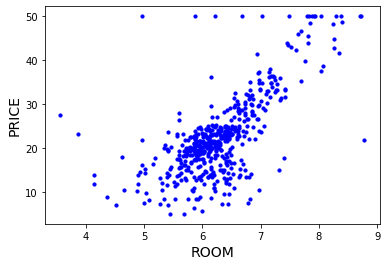

In [ ]:
# 산점도를 표시
plt.scatter(x[:,1], yt, s=10, c='b')
plt.xlabel('ROOM', fontsize=14)
plt.ylabel('PRICE', fontsize=14)
plt.show()

In [ ]:
def pred(x, w):
    return(x @ w)

In [ ]:
#데이터 전체 건수
M=x.shape[0]

#입력 데이터의 차수
D=x.shape[1]
print(D)
#반복횟수
iters=50000

#학습률
alpha=0.01

#가중치 벡터의 초깃값
w=np.ones(D)
#평과 기록(손실함수값)
history=np.zeros((0,2))

2


In [ ]:
# 반복 루프
for k in range(iters):
    
    # 예측값 계산 
    yp = pred(x, w)
    
    # 오차 계산 
    yd = yp - yt
    
    # 경사하강법 적용 
    w = w - alpha * (x.T @ yd) / M
    
    # 학습 곡선을 그리기 위한 데이터 계산 및 저장
    if (k % 100 == 0):
        # 손실함숫값의 계산 
        loss = np.mean(yd ** 2) / 2
        # 계산 결과의 기록
        history = np.vstack((history, np.array([k, loss])))
        # 화면 표시
        print( "iter = %d loss = %f" % (k, loss))

iter = 0 loss = 154.224934
iter = 100 loss = 29.617518
iter = 200 loss = 29.431766
iter = 300 loss = 29.250428
iter = 400 loss = 29.073399
iter = 500 loss = 28.900577
iter = 600 loss = 28.731861
iter = 700 loss = 28.567154
iter = 800 loss = 28.406360
iter = 900 loss = 28.249388
iter = 1000 loss = 28.096145
iter = 1100 loss = 27.946544
iter = 1200 loss = 27.800498
iter = 1300 loss = 27.657922
iter = 1400 loss = 27.518733
iter = 1500 loss = 27.382852
iter = 1600 loss = 27.250200
iter = 1700 loss = 27.120700
iter = 1800 loss = 26.994277
iter = 1900 loss = 26.870858
iter = 2000 loss = 26.750372
iter = 2100 loss = 26.632749
iter = 2200 loss = 26.517921
iter = 2300 loss = 26.405821
iter = 2400 loss = 26.296385
iter = 2500 loss = 26.189549
iter = 2600 loss = 26.085252
iter = 2700 loss = 25.983433
iter = 2800 loss = 25.884034
iter = 2900 loss = 25.786997
iter = 3000 loss = 25.692265
iter = 3100 loss = 25.599784
iter = 3200 loss = 25.509501
iter = 3300 loss = 25.421363
iter = 3400 loss = 25.335

In [ ]:
# 최종 손실함수 초깃값, 최종값
print('손실함수 초깃값: %f' % history[0,1])
print('손실함수 최종값: %f' % history[-1,1])

손실함수 초깃값: 154.224934
손실함수 최종값: 21.800325


In [ ]:
xall=x[:,1].ravel()
x1=np.array([[1,xall.min()],[1,xall.max()]])
y1=pred(x1,w)
print(x1)
print(y1)

[[1.    3.561]
 [1.    8.78 ]]
[-2.21914767 45.21232425]


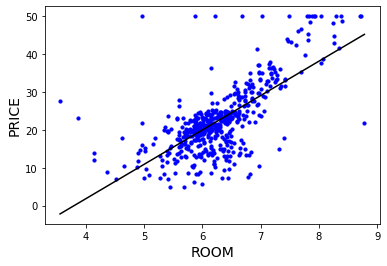

In [ ]:
# 산점도 & 회귀직선
plt.scatter(x[:,1], yt, s=10, c='b')
plt.xlabel('ROOM', fontsize=14)
plt.ylabel('PRICE', fontsize=14)
plt.plot(x1[:,1],y1,c='k')
plt.show()

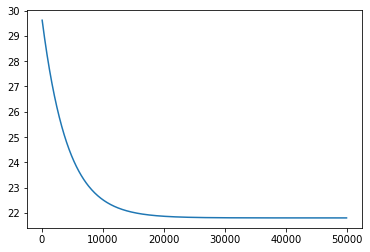

In [ ]:
#학습 곡선
plt.plot(history[1:,0],history[1:,1])

In [ ]:
## 다중회귀 모델로의 확장
#저소득층 비율을 추가
x_add=x_org[:,feature_names=='LSTAT']
x2=np.hstack((x,x_add))
print(x2.shape)

(506, 3)


In [ ]:
#데이터 전체 건수
M=x2.shape[0]

#입력 데이터의 차수
D=x2.shape[1]
print(D)
#반복횟수(조정)
iters=2000

#학습률(조정)
alpha=0.001

#가중치 벡터의 초깃값
w=np.ones(D)

#평과 기록(손실함수값)
history=np.zeros((0,2))

# 반복 루프
for k in range(iters):
    
    # 예측값 계산 
    yp = pred(x2, w)
    
    # 오차 계산 
    yd = yp - yt
    
    # 경사하강법 적용 
    w = w - alpha * (x2.T @ yd) / M
    
    # 학습 곡선을 그리기 위한 데이터 계산 및 저장
    if (k % 100 == 0):
        # 손실함숫값의 계산 
        loss = np.mean(yd ** 2) / 2
        # 계산 결과의 기록
        history = np.vstack((history, np.array([k, loss])))
        # 화면 표시
        print( "iter = %d loss = %f" % (k, loss))

3
iter = 0 loss = 112.063982
iter = 100 loss = 25.358934
iter = 200 loss = 16.391055
iter = 300 loss = 15.403015
iter = 400 loss = 15.294135
iter = 500 loss = 15.282114
iter = 600 loss = 15.280764
iter = 700 loss = 15.280589
iter = 800 loss = 15.280544
iter = 900 loss = 15.280514
iter = 1000 loss = 15.280485
iter = 1100 loss = 15.280456
iter = 1200 loss = 15.280428
iter = 1300 loss = 15.280399
iter = 1400 loss = 15.280371
iter = 1500 loss = 15.280342
iter = 1600 loss = 15.280314
iter = 1700 loss = 15.280285
iter = 1800 loss = 15.280257
iter = 1900 loss = 15.280228


In [ ]:
# 최종 손실함수 초깃값, 최종값
print('손실함수 초깃값: %f' % history[0,1])
print('손실함수 최종값: %f' % history[-1,1])

손실함수 초깃값: 112.063982
손실함수 최종값: 15.280228


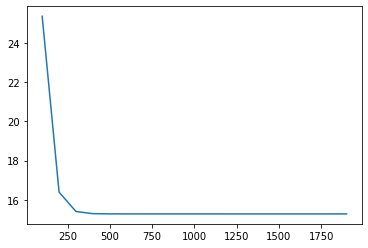

In [ ]:
#학습 곡선
plt.plot(history[1:,0],history[1:,1])